$$
\Large \textbf{Problema 5}
$$

El agua de un lago de zonas templadas, al igual que el líquido en un reactor de procesos químicos, está térmicamente estratificada. Cerca de la superficie el agua es tibia y liviana (epilimnion) y en el fondo más fría y densa (hipolimnion). Ambas capas estan separadas, aproximadamente, por un plano conocido por thermocline, donde la derivada segunda de la temperatura respecto de la profundidad se hace cero (o la derivada primera tiene su máximo). A esa profundidad el flujo de calor de la superficie al fondo de la capa se puede calcular con la ley de Fourier,

$$ \large
J=-k\frac{dT}{dz}
$$

Dados los datos de la tabla siguiente, correspondientes a la temperatura del líquido de un reactor en función de la profundidad usando el método de splines. Encuentre la posición aproximada de la thermocline y calcule el flujo de calor a través de la interfaz (tome $\text{k = 0.01 cal/(s cm °C)}$)

$$ 
\begin{equation}
\begin{matrix}
z(m) & 0 & 0.5 & 1.0 & 1.5 & 2.0 & 2.5 & 3.0\\
T(°C) & 70 & 68 & 55 & 22 & 13 & 11 & 10
\end{matrix}
\end{equation}\ 
$$

In [1]:
import Tools as tl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S = np.transpose(np.loadtxt('datos_P5.txt', unpack=True))
# se forman dos vectores fila con los datos correspondientes a ese archivo

Text(0.5, 1.0, 'Mediciones')

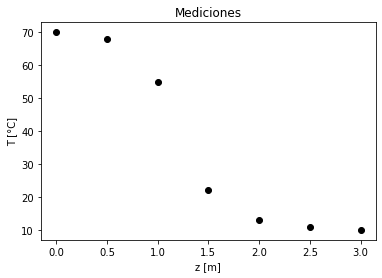

In [3]:
plt.plot(S[:, 0], S[:, 1], 'ok')
plt.xlabel('z [m]')
plt.ylabel('T [°C]')
plt.title('Mediciones')

Elijo r0 y rn = 0 como las 2 condiciones restantes para poder resolver la spline cúbica
z = 1 para indicar que las condiciones corresponden a los valores de las derivadas primeras en los extremos
'p' nos da la cantidad de puntos que se generan para cada una de las curvas (mayor 'p' mayor precisión)

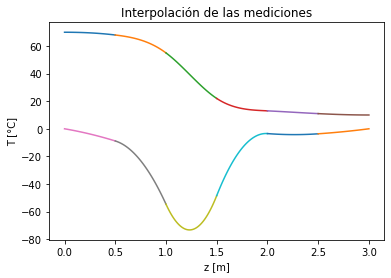

In [4]:
r0 = 0
rn = 0
z = 1
coef = np.array(tl.spline3(S, z, r0, rn))
plt.title('Interpolación de las mediciones')
plt.xlabel('z [m]')
plt.ylabel('T [°C]')
fd = tl.grspline3(S, coef, 70, 1)

Grafico todas las curvas correspondientes con la función que cree llamada grspline3

In [5]:
min(np.array(fd).ravel())

/tmp/ipykernel_29809/2627615067.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  min(np.array(fd).ravel())


TypeError: '>' not supported between instances of 'float' and 'NoneType'

In [6]:
fd

(array([[ 0.00000000e+00, -9.23852455e-02, -1.85817459e-01,
         -2.80296641e-01, -3.75822791e-01, -4.72395909e-01,
         -5.70015995e-01, -6.68683050e-01, -7.68397072e-01,
         -8.69158063e-01, -9.70966022e-01, -1.07382095e+00,
         -1.17772284e+00, -1.28267171e+00, -1.38866754e+00,
         -1.49571034e+00, -1.60380011e+00, -1.71293684e+00,
         -1.82312055e+00, -1.93435122e+00, -2.04662886e+00,
         -2.15995347e+00, -2.27432504e+00, -2.38974359e+00,
         -2.50620910e+00, -2.62372158e+00, -2.74228103e+00,
         -2.86188745e+00, -2.98254084e+00, -3.10424119e+00,
         -3.22698851e+00, -3.35078280e+00, -3.47562406e+00,
         -3.60151229e+00, -3.72844748e+00, -3.85642964e+00,
         -3.98545878e+00, -4.11553487e+00, -4.24665794e+00,
         -4.37882798e+00, -4.51204498e+00, -4.64630895e+00,
         -4.78161989e+00, -4.91797780e+00, -5.05538268e+00,
         -5.19383452e+00, -5.33333333e+00, -5.47387911e+00,
         -5.61547186e+00, -5.75811158e+0

el problema es que fd es una lista de listas, cada lista interna corresponde a un intervalo, si no me equivoco. Lo que habría que hacer es armar in hcat,

In [20]:
stack1 = np.hstack(fd[0])

Y el otro tema es que en realidad te conviene siempre separar las evaluaciones de los gráficos. en este caso solo con los coeficientes podes evaluar los polinomios,

In [91]:
stack1.min()

-73.3269158063109

# algunos truquitos:

In [102]:
h = np.diff(S[:,0])

In [103]:
X = [np.linspace(xi, xi+9*hi/10,9) for xi, hi  in zip(S[:-1,0], h)]

In [104]:
feval = [np.polyval(coefi, XI-Si) for coefi, XI, Si in zip(coef.transpose(),X, S[:-1,0])]

[[<matplotlib.lines.Line2D at 0x7f3b3e8739a0>],

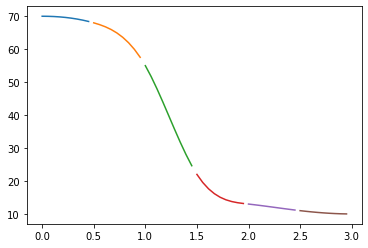

In [105]:
[plt.plot(Xi, fevali) for Xi, fevali in zip(X,feval)]

las derivadas las podes calcular a partir de los coeficientes:
    

o bien:
    

In [106]:
feval = np.hstack(feval)

In [107]:
X = np.hstack(X)

In [108]:
fderiv = np.gradient(feval, X)

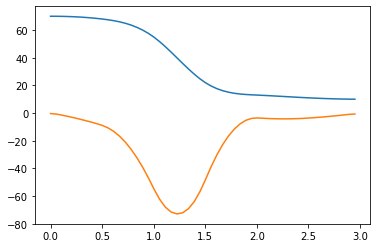

In [111]:
plt.plot(X,feval)
plt.plot(X, fderiv)

In [112]:
np.min(fderiv)

-72.94441346153843